In [1]:
# AUTHOR: KATS JAYATHILAKA - 209338R
# DESCRIPTION: This is an assignment done on neural networks for the machine learnining module - MSc2020
#              Classification of MNIST dataset using a deep neural network

In [2]:
# importing tensorflow lib
import tensorflow as tf

In [3]:
# importing built-in MNIST dataset
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits

In [4]:
# splitting into train and test sets by the default proportions
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# imnporting libs for train test splitting
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
x = np.concatenate((x_train, x_test))  # join all rows of attribute data
y = np.concatenate((y_train, y_test))  # join all target classes

In [7]:
TRAIN_SIZE = 0.95  # custom train test split proportion

# Randome state is set to my index no.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=TRAIN_SIZE, random_state=209338)

In [8]:
# importing plotting libs
import matplotlib.pyplot as plt

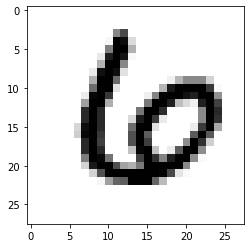

6

In [9]:
# previewing the image and the target class
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
y_train[0]

In [10]:
# z-score standardization of attribute data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [11]:
# adding some noise to the data
NOISE_FACTOR = 0.25

x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

<function matplotlib.pyplot.show(*args, **kw)>

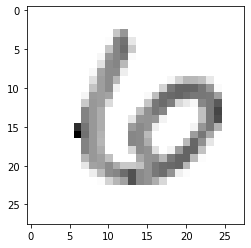

In [12]:
# previewing the image using the standardized data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [13]:
# creating the Deep Neural Network Model
model = tf.keras.models.Sequential()  # feed-forward model

# adding input layer by flattening the input attributes into a single dimension'
model.add(tf.keras.layers.Flatten())

# adding hidden layers
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))

# adding output layer
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

# compllie the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
EPOCHS = 20

# training for multiple epochs
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/20
66500/66500 [==============================] - 6s 89us/sample - loss: 0.2240 - acc: 0.9330
Epoch 2/20
66500/66500 [==============================] - 6s 85us/sample - loss: 0.0863 - acc: 0.9728
Epoch 3/20
66500/66500 [==============================] - 6s 86us/sample - loss: 0.0572 - acc: 0.9821
Epoch 4/20
66500/66500 [==============================] - 6s 86us/sample - loss: 0.0405 - acc: 0.9869
Epoch 5/20
66500/66500 [==============================] - 6s 84us/sample - loss: 0.0311 - acc: 0.9892
Epoch 6/20
66500/66500 [==============================] - 6s 87us/sample - loss: 0.0242 - acc: 0.9918
Epoch 7/20
66500/66500 [==============================] - 6s 96us/sample - loss: 0.0194 - acc: 0.9935
Epoch 8/20
66500/66500 [==============================] - 6s 97us/sample - loss: 0.0171 - acc: 0.9943
Epoch 9/20
66500/66500 [==============================] - 6s 95us/sample - loss: 0.0145 - acc: 0.9954
Epoch 10/20
66500/66500 [==============================] - 6s 93us/sample - loss: 

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

3500/3500 [==============================] - 0s 44us/sample - loss: 0.1204 - acc: 0.9806
